In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
for dirname, _, filenames in os.walk('/kaggle/working'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bangla-stopwords/stopwords_bangla.xlsx
/kaggle/input/banglamct7-bangla-multiclass-text-dataset-7-tags/BanglaMCT7/train.csv
/kaggle/input/banglamct7-bangla-multiclass-text-dataset-7-tags/BanglaMCT7/test.csv
/kaggle/working/__notebook__.ipynb


# **Import Libraries**

In [2]:
import numpy as np
import tensorflow as tf
import h5py
import csv
import math
import pandas as pd 
import matplotlib.pyplot as plt
from pandas import read_excel
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM,Dense,Embedding,SpatialDropout1D,Flatten,Bidirectional
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split
from keras import regularizers
#from bnltk.stemmer import BanglaStemmer
#from bangla_stemmer.stemmer import stemmer
from gensim.models import Word2Vec
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from matplotlib import pyplot as plt
from sklearn.svm import SVC
import seaborn as sns
import eli5
#ç
import pandas as pd
import numpy as np
import re
from re import sub
import multiprocessing
from unidecode import unidecode
import os
import glob
from gensim.models.phrases import Phrases, Phraser
from gensim.models import Word2Vec
from gensim.test.utils import get_tmpfile
from gensim.models import KeyedVectors
from gensim.models import Word2Vec
from time import time 
from collections import defaultdict
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import MultinomialNB

# **Updating Libraries**

In [3]:
!pip install xlrd
!pip install openpyxl
!pip install -U scikit-learn

     |████████████████████████████████| 96 kB 979 kB/s 
     |████████████████████████████████| 242 kB 889 kB/s 
     |████████████████████████████████| 23.1 MB 786 kB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pdpbox 0.2.1 requires matplotlib==3.1.1, but you have matplotlib 3.4.3 which is incompatible.
hypertools 0.7.0 requires scikit-learn!=0.22,<0.24,>=0.19.1, but you have scikit-learn 1.0 which is incompatible.


# **Load Dataset**

In [4]:
df_train=pd.read_csv("/kaggle/input/banglamct7-bangla-multiclass-text-dataset-7-tags/BanglaMCT7/train.csv")
df_test=pd.read_csv("/kaggle/input/banglamct7-bangla-multiclass-text-dataset-7-tags/BanglaMCT7/test.csv")

display(df_train)
display(df_test)

,category,text,cleanText
0,economy,বাংলাদেশে সফররত বিশ্ব বাণিজ্য সংস্থা (ডব্লিউট...,বাংলাদেশে সফররত বিশ্ব বাণিজ্য সং...
1,sports,ইউরোপিয়ান ফুটবলে আজ ঝড় বয়ে যাচ্ছে। একদিকে সংবা...,ইউরোপিয়ান ফুটবলে বয়ে একদিকে সংবা...
2,international,বিজেপির নেতৃত্বে ভারতের উত্তর প্রদেশ থেকে শুরু...,বিজেপির নেতৃত্বে ভারতের উত্তর প্...
3,state,নারায়ণগঞ্জের সোনারগাঁ উপজেলার একটি সরকারি প্র...,নারায়ণগঞ্জের সোনারগাঁ উপজেলার সরকা...
4,sports,"‘ছাই থেকে ছাই, ধুলো থেকে ধুলো...’ আধ্যাত্মিক ক...",ছাই ছাই ধুলো ধুলো আধ্যাত্মিক ...
...,...,...,...
98878,education,সহকারী অধ্যাপক টিচার্স ট্রেনিং কলেজ (মহিলা)...,সহকারী অধ্যাপক টিচার্স ট্রেনিং ক...
98879,entertainment,অক্টোবরের ১১ তারিখে ৭৫ বছর পূর্ণ করবেন অমিতাভ ...,অক্টোবরের তারিখে বছর পূর্ণ অমিতা...
98880,technology,কাজী নাঈম আল রশিদ। সফটওয়্যার প্রকৌশলী। কাজ করে...,কাজী নাঈম রশিদ সফটওয়্যার প্রকৌশল...
98881,technology,ইয়াহুকে মার্কিন টেলিকম প্রতিষ্ঠান ভেরাইজন কিনে...,ইয়াহুকে মার্কিন টেলিকম প্রতিষ্ঠান ...


,category,text,cleanText
0,education,"অধ্যায়-২প্রিয় পরীক্ষার্থী, আজ তথ্য ও যোগাযোগ প...",অধ্যায় প্রিয় পরীক্ষার্থী তথ্য যো...
1,sports,"স্পিন, স্পিন, স্পিন। লর্ডসে ইয়াসির শাহ্‌র লেগ ...",স্পিন স্পিন স্পিন লর্ডসে ইয়াসির ...
2,international,সিরিয়ার উত্তর-পশ্চিমাঞ্চলে গতকাল রোববার বিমান...,সিরিয়ার উত্তর পশ্চিমাঞ্চলে গতকাল ...
3,international,দক্ষিণ আফ্রিকার কেপটাউন বিশ্ববিদ্যালয়ের (ইউসিট...,দক্ষিণ আফ্রিকার কেপটাউন বিশ্ববিদ্যা...
4,technology,সহজে ডিজিটাল আর্থিক সেবা দিতে অ্যাপ ও ডিজিটাল ...,সহজে ডিজিটাল আর্থিক সেবা অ্যাপ ...
...,...,...,...
98879,sports,১৯৫৯ সালে ইউরোপিয়ান ক্লাব কাপে জাতীয় দল পাঠান...,সালে ইউরোপিয়ান ক্লাব কাপে জাতীয়...
98880,entertainment,গানের দল সহজিয়ার প্রথম অ্যালবাম ‘রঙমিস্ত্রী’র ...,গানের সহজিয়ার প্রথম অ্যালবাম রঙম...
98881,international,ফেসবুকের ৮১ হাজার ব্যবহারকারীর তথ্য চুরি করে স...,ফেসবুকের হাজার ব্যবহারকারীর তথ্য ...
98882,economy,পেট্রোল পাম্পে তেল বা সিএনজির বিল বিকাশের মাধ...,পেট্রোল পাম্পে তেল সিএনজির বিল ...


# **Train/Test Split**
**We have seen on EDA that,Train and Test set are almost equal in size and classwise ratio is identical. So to build a robust model i have used full train set for training the model and test set for testing. So test and train ratio can be called 50-50.**

# **Preprocessing**

In [5]:
def text_to_word_list(text):
    text = text.split()
    return text

def replace_strings(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\u00C0-\u017F"          #latin
                           u"\u2000-\u206F"          #generalPunctuations
                               
                           "]+", flags=re.UNICODE)
    english_pattern=re.compile('[a-zA-Z0-9]+', flags=re.I)
    #latin_pattern=re.compile('[A-Za-z\u00C0-\u00D6\u00D8-\u00f6\u00f8-\u00ff\s]*',)
    
    text=emoji_pattern.sub(r'', text)
    text=english_pattern.sub(r'', text)

    return text

def remove_punctuations(my_str):
    # define punctuation
    punctuations = '''````£|¢|Ñ+-*/=EROero৳০১২৩৪৫৬৭৮৯012–34567•89।!()-[]{};:'"“\’,<>./?@#$%^&*_~‘—॥”‰🤣⚽️✌�￰৷￰'''
    
    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char

    # display the unpunctuated string
    return no_punct



def joining(text):
    out=' '.join(text)
    return out

def preprocessing(text):
    out=remove_punctuations(replace_strings(text))
    return out

In [6]:
#df['cleanText'] = df.cleanText.apply(lambda x: preprocessing(str(x)))

# **Stopwords Removal**

In [7]:
data1 =pd.read_excel('/kaggle/input/bangla-stopwords/stopwords_bangla.xlsx')
display(data1)
stop = data1['words'].tolist()

,Unnamed: 0,words
0,0,অই
1,1,অগত্যা
2,2,অত: পর
3,3,অতএব
4,4,অথচ
...,...,...
727,727,হয়েই
728,728,হয়েছিল
729,729,হয়েছে
730,730,হয়েছেন


In [8]:
def stopwordRemoval(text):    
    x=str(text)
    l=x.split()

    stm=[elem for elem in l if elem not in stop]
    
    out=' '.join(stm)
    
    return str(out)

In [9]:
df_train['cleanText'] = df_train.cleanText.apply(lambda x: stopwordRemoval(str(x)))
df_test['cleanText'] = df_test.cleanText.apply(lambda x: stopwordRemoval(str(x)))

# **Stemming**

In [10]:
#make sure to turn on internet on your kernel
#importing stemmer
!pip install bangla-stemmer
from bangla_stemmer.stemmer import stemmer
## stemmer function
def stem_text (x):
  stmr = stemmer.BanglaStemmer()
  words=x.split(' ')
  stm = stmr.stem(words)
  words=(' ').join(stm)
  return words

**I have noticed stemming doesn't improve accuracy in this dataset, so i have commented it out.**

In [11]:
#df_train['cleanText']=df_train['cleanText'].apply(stem_text)
#df_test['cleanText']=df_test['cleanText'].apply(stem_text)

# **Changing Labels to Numbers**

In [12]:
df_train["category"].replace({"economy": "0", "sports": "1","international": "2","state": "3","technology": "4","entertainment": "5","education": "6"}, inplace=True)
df_test["category"].replace({"economy": "0", "sports": "1","international": "2","state": "3","technology": "4","entertainment": "5","education": "6"}, inplace=True)
display(df_train)
display(df_test)

,category,text,cleanText
0,0,বাংলাদেশে সফররত বিশ্ব বাণিজ্য সংস্থা (ডব্লিউট...,বাংলাদেশে সফররত বাণিজ্য সংস্থা ডব্লিউটিও মহাপর...
1,1,ইউরোপিয়ান ফুটবলে আজ ঝড় বয়ে যাচ্ছে। একদিকে সংবা...,ইউরোপিয়ান ফুটবলে বয়ে একদিকে সংবাদমাধ্যমগুলো নে...
2,2,বিজেপির নেতৃত্বে ভারতের উত্তর প্রদেশ থেকে শুরু...,বিজেপির নেতৃত্বে ভারতের প্রদেশ ঐতিহাসিক স্থানে...
3,3,নারায়ণগঞ্জের সোনারগাঁ উপজেলার একটি সরকারি প্র...,নারায়ণগঞ্জের সোনারগাঁ উপজেলার সরকারি বিদ্যালয...
4,1,"‘ছাই থেকে ছাই, ধুলো থেকে ধুলো...’ আধ্যাত্মিক ক...",ছাই ছাই ধুলো ধুলো আধ্যাত্মিক বাক্যের অর্থটা সে...
...,...,...,...
98878,6,সহকারী অধ্যাপক টিচার্স ট্রেনিং কলেজ (মহিলা)...,সহকারী অধ্যাপক টিচার্স ট্রেনিং কলেজ মহিলা ময়মন...
98879,5,অক্টোবরের ১১ তারিখে ৭৫ বছর পূর্ণ করবেন অমিতাভ ...,অক্টোবরের তারিখে পূর্ণ অমিতাভ বচ্চন জন্মদিন এক...
98880,4,কাজী নাঈম আল রশিদ। সফটওয়্যার প্রকৌশলী। কাজ করে...,কাজী নাঈম রশিদ সফটওয়্যার প্রকৌশলী মাইক্রোসফটে ...
98881,4,ইয়াহুকে মার্কিন টেলিকম প্রতিষ্ঠান ভেরাইজন কিনে...,ইয়াহুকে মার্কিন টেলিকম প্রতিষ্ঠান ভেরাইজন কিনে...


,category,text,cleanText
0,6,"অধ্যায়-২প্রিয় পরীক্ষার্থী, আজ তথ্য ও যোগাযোগ প...",অধ্যায় প্রিয় পরীক্ষার্থী তথ্য যোগাযোগ প্রযুক্ত...
1,1,"স্পিন, স্পিন, স্পিন। লর্ডসে ইয়াসির শাহ্‌র লেগ ...",স্পিন স্পিন স্পিন লর্ডসে ইয়াসির শাহ্ র লেগ স্প...
2,2,সিরিয়ার উত্তর-পশ্চিমাঞ্চলে গতকাল রোববার বিমান...,সিরিয়ার পশ্চিমাঞ্চলে গতকাল রোববার বিমান হামলা...
3,2,দক্ষিণ আফ্রিকার কেপটাউন বিশ্ববিদ্যালয়ের (ইউসিট...,দক্ষিণ আফ্রিকার কেপটাউন বিশ্ববিদ্যালয়ের ইউসিটি...
4,4,সহজে ডিজিটাল আর্থিক সেবা দিতে অ্যাপ ও ডিজিটাল ...,সহজে ডিজিটাল আর্থিক সেবা অ্যাপ ডিজিটাল কেওয়াইস...
...,...,...,...
98879,1,১৯৫৯ সালে ইউরোপিয়ান ক্লাব কাপে জাতীয় দল পাঠান...,সালে ইউরোপিয়ান ক্লাব কাপে জাতীয় পাঠানোর প্রস...
98880,5,গানের দল সহজিয়ার প্রথম অ্যালবাম ‘রঙমিস্ত্রী’র ...,গানের সহজিয়ার অ্যালবাম রঙমিস্ত্রী প্রকাশনা উত্...
98881,2,ফেসবুকের ৮১ হাজার ব্যবহারকারীর তথ্য চুরি করে স...,ফেসবুকের ব্যবহারকারীর তথ্য চুরি বিক্রির বিজ্ঞা...
98882,0,পেট্রোল পাম্পে তেল বা সিএনজির বিল বিকাশের মাধ...,পেট্রোল পাম্পে তেল সিএনজির বিল বিকাশের পরিশোধ ...


# **Removing Null values**

In [13]:
#display non-null values
df_train = df_train.dropna()
df_test = df_test.dropna()

# **Removing Small Texts**

In [14]:
#counting text length
df_train['count'] = df_train['cleanText'].str.split().str.len()
df_test['count'] = df_test['cleanText'].str.split().str.len()
# Remove the text with words less than 5
df_train= df_train.loc[df_train['count']>5]
df_test= df_test.loc[df_test['count']>5]

# **Feature Extraction with TFIDF**

**I have tried to tune parameters for max_features and 10000 seems to provide better result**

In [15]:
#max features 5000,10000,50000,100000
text_transformer = TfidfVectorizer(ngram_range=(1, 3),lowercase=True, max_features=10000)
#%%time
X_train_text = text_transformer.fit_transform(df_train['cleanText'].values)
X_test_text = text_transformer.transform(df_test['cleanText'].values)

# **Model Creation of Logistic Regression**

**All the parameters are optimized by grid search.**

In [16]:
#C_param_range = [0.001,0.01,0.1,1,10,100]
#saga is proved best for large dataset
logit = LogisticRegression(C=.95,penalty='l2',solver='saga', multi_class='multinomial', random_state=17, n_jobs=4)

In [17]:
model=logit.fit(X_train_text, df_train['category'].values)

# **Model Creation of Multinomial Naive Bayes**

**All the parameters are optimized by grid search.**

In [18]:
#0.5, 1.5, 6
nb=MultinomialNB(alpha=1.5)

In [19]:
model=nb.fit(X_train_text, df_train['category'].values)

# **Logistic Regression Evaluation**

In [20]:
test_preds = logit.predict(X_test_text)
test_labels=df_test['category'].values
#print(accuracy_score(test_labels,test_preds))
test_result=accuracy_score(test_labels,test_preds)

precision, recall, fscore, _ = precision_recall_fscore_support(test_labels,test_preds, average='weighted')


score = model.score(X_test_text,test_labels)
print(score)


print("Testing Accuracy: "+str(test_result))

print("Precision :"+str(precision))
print("Recall :"+str(recall))
print("fscore :"+str(fscore))


0.8858939893482121
Testing Accuracy: 0.9156784174486432
Precision :0.915713162947648
Recall :0.9156784174486432
fscore :0.9156376368750855


,precision,recall,f1-score,support
economy,88.73,89.76,89.25,14479.000000
sports,97.64,96.34,96.99,15865.000000
international,90.74,92.76,91.74,15313.000000
state,89.04,86.97,87.99,15183.000000
technology,88.51,87.08,87.79,9935.000000
entertainment,93.57,94.59,94.08,15242.000000
education,91.23,91.61,91.42,12558.000000
accuracy,91.57,91.57,91.57,0.915678
macro avg,91.35,91.30,91.32,98575.000000
weighted avg,91.57,91.57,91.56,98575.000000


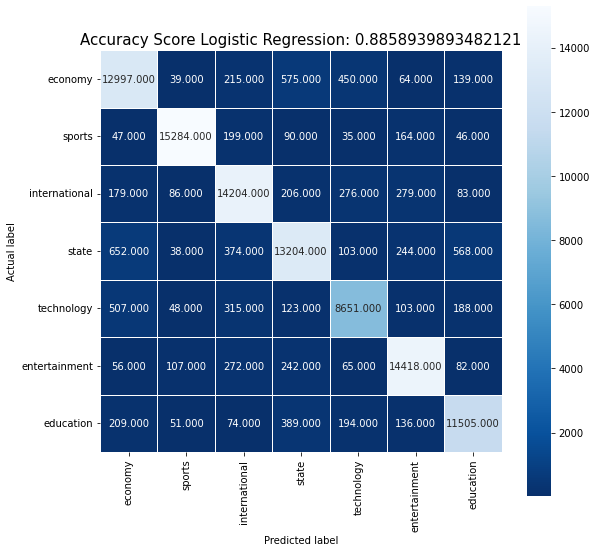

In [21]:
cm = metrics.confusion_matrix(test_labels,test_preds)
plt.figure(figsize=(9,9))
cm_df = pd.DataFrame(cm,index = ['economy' ,'sports' ,'international', 'state','technology', 'entertainment', 'education'], 
                     columns = ['economy' ,'sports' ,'international', 'state','technology', 'entertainment', 'education'])

sns.heatmap(cm_df, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score Logistic Regression: {0}'.format(score)
plt.title(all_sample_title, size = 15);

report = pd.DataFrame(classification_report(y_true = test_labels, y_pred = test_preds, output_dict=True)).transpose()
report = report.rename(index={'0': 'economy','1':'sports','2':'international','3':'state','4':'technology','5':'entertainment','6':'education'})
report[['precision','recall','f1-score']]=report[['precision','recall','f1-score']].apply(lambda x: round(x*100,2))
display(report)

# **Multinomial Naive Bayes Evaluation**

0.8858939893482121
Testing Accuracy: 0.8858939893482121
Precision :0.8863059851681149
Recall :0.8858939893482121
fscore :0.8859202000415151


,precision,recall,f1-score,support
economy,86.60,85.93,86.26,14479.000000
sports,96.72,94.34,95.51,15865.000000
international,87.87,90.51,89.17,15313.000000
state,84.24,82.68,83.46,15183.000000
technology,82.73,86.08,84.37,9935.000000
entertainment,90.42,93.05,91.72,15242.000000
education,89.47,85.76,87.58,12558.000000
accuracy,88.59,88.59,88.59,0.885894
macro avg,88.29,88.34,88.30,98575.000000
weighted avg,88.63,88.59,88.59,98575.000000


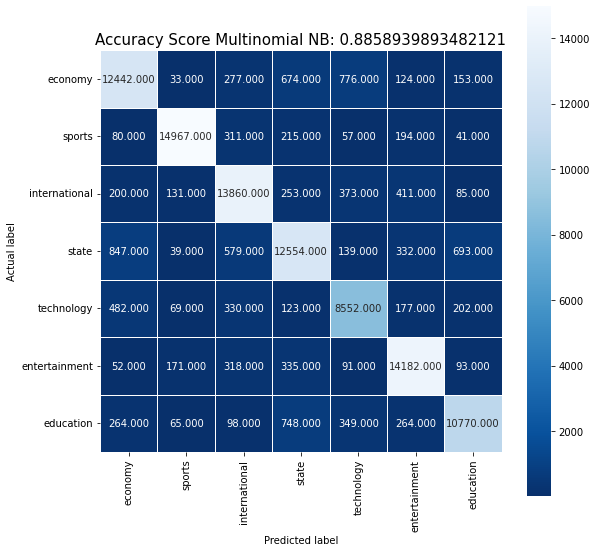

In [22]:
test_preds = nb.predict(X_test_text)
test_labels=df_test['category'].values
#print(accuracy_score(test_labels,test_preds))
test_result=accuracy_score(test_labels,test_preds)

precision, recall, fscore, _ = precision_recall_fscore_support(test_labels,test_preds, average='weighted')


score = model.score(X_test_text,test_labels)
print(score)


print("Testing Accuracy: "+str(test_result))

print("Precision :"+str(precision))
print("Recall :"+str(recall))
print("fscore :"+str(fscore))


cm = metrics.confusion_matrix(test_labels,test_preds)
cm_df = pd.DataFrame(cm,index = ['economy' ,'sports' ,'international', 'state','technology', 'entertainment', 'education'], 
                     columns = ['economy' ,'sports' ,'international', 'state','technology', 'entertainment', 'education'])


plt.figure(figsize=(9,9))
sns.heatmap(cm_df, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score Multinomial NB: {0}'.format(score)
plt.title(all_sample_title, size = 15);

report = pd.DataFrame(classification_report(y_true = test_labels, y_pred = test_preds, output_dict=True)).transpose()
report = report.rename(index={'0': 'economy','1':'sports','2':'international','3':'state','4':'technology','5':'entertainment','6':'education'})
report[['precision','recall','f1-score']]=report[['precision','recall','f1-score']].apply(lambda x: round(x*100,2))
display(report)

# **Conclusion**
**After Hyperparameter Tuning and comparing the evaluation measures, we can say that Logistic Regression provides better result.**